In [7]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline


In [9]:
# загружаем датасет
boston = datasets.load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [11]:
# Хотим узнать, как обращаться к столбцам bostonDF
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [12]:
# полная матрица корреляций
# используем pandas corr()
C = bostonDF.corr(method='pearson')
C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


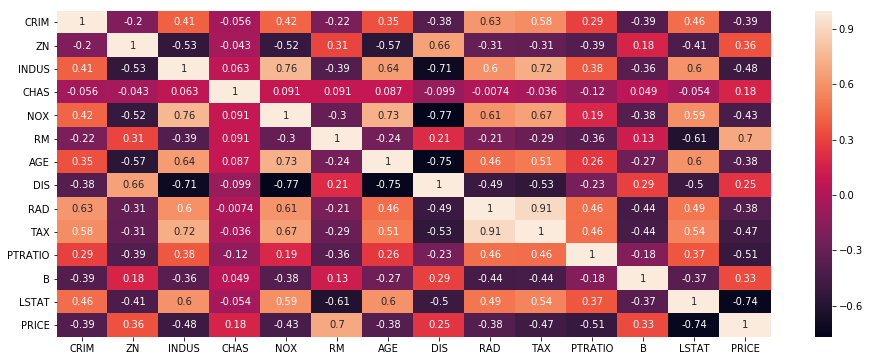

In [13]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

In [14]:
# Строим регресисю из видео

In [16]:
Data=bostonDF[['CRIM','RM']]
Data.head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [17]:
np.shape(Data)

(506, 2)

In [18]:
# Создаем вектор из единиц для коэффициента w_0 и записывает все векторы в СТОЛБЦЫ матрицы признаков А
CRIM=Data['CRIM']
RM= Data['RM']
A= np.column_stack((np.ones(506), CRIM, RM))
A

array([[1.0000e+00, 6.3200e-03, 6.5750e+00],
       [1.0000e+00, 2.7310e-02, 6.4210e+00],
       [1.0000e+00, 2.7290e-02, 7.1850e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 6.9760e+00],
       [1.0000e+00, 1.0959e-01, 6.7940e+00],
       [1.0000e+00, 4.7410e-02, 6.0300e+00]])

In [19]:
# Добавим настройку для удобного чтения значений А
np.set_printoptions(suppress=True)
A

array([[1.     , 0.00632, 6.575  ],
       [1.     , 0.02731, 6.421  ],
       [1.     , 0.02729, 7.185  ],
       ...,
       [1.     , 0.06076, 6.976  ],
       [1.     , 0.10959, 6.794  ],
       [1.     , 0.04741, 6.03   ]])

In [20]:
# Создаем целевой вектор
y=bostonDF[['PRICE']]

In [21]:
# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
w_hat

,PRICE
0,-29.244719
1,-0.264913
2,8.391068


In [24]:
# прогноз
# добавились данные по новому городку:
CRIM_new=0.1
RM_new=8
# делаем прогноз типичной соимости дома
PRICE_new=w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
PRICE_new

PRICE    37.857335
dtype: float64

In [25]:
# короткий способ сделать прогноз
new=np.array([1,CRIM_new,RM_new])
new@w_hat

PRICE    37.857335
dtype: float64

In [26]:
# классическая OLS регрессия в numpy одной командой
np.linalg.lstsq(A,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([[-29.24471945],
        [ -0.26491325],
        [  8.39106825]]),
 array([19565.80724199]),
 3,
 array([219.85111475, 127.94826644,   2.38123074]))

In [27]:
# Стандартизация данных

In [29]:
Data.head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [30]:
meanCRIM = Data['CRIM'].mean()
meanRM  = Data['RM'].mean()
mean_y = y.mean()
print('mean value of CRIME:', meanCRIM)
print('mean value of RM:', meanRM)
print('mean value of PRICE:', mean_y)

mean value of CRIME: 3.6135235573122535
mean value of RM: 6.284634387351787
mean value of PRICE: PRICE    22.532806
dtype: float64


In [31]:
# Центрирование
CRIM_c = Data['CRIM'] - meanCRIM
RM_c = Data['RM'] - meanRM
y_c = y - mean_y

In [32]:
CRIM_c_norm = np.linalg.norm(CRIM_c)
RM_c_norm = np.linalg.norm(RM_c)
y_c_norm = np.linalg.norm(y_c)

In [33]:
# Нормирование
CRIM_st=CRIM_c / CRIM_c_norm
RM_st=RM_c / RM_c_norm
y_st=y_c / y_c_norm

In [34]:
# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( CRIM_st, RM_st,))
A_st

array([[-0.01866158,  0.01838996],
       [-0.01855299,  0.00863655],
       [-0.0185531 ,  0.05702358],
       ...,
       [-0.01837994,  0.04378681],
       [-0.01812732,  0.03226006],
       [-0.01844901, -0.01612696]])

In [35]:
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[-0.24775878],
       [ 0.64103965]])

In [36]:
# добавились данные по новому городку:
CRIM_new=0.1
RM_new=8


In [37]:
# Стандартизация новых данных
CRIM_new_st = (CRIM_new - meanCRIM) / CRIM_c_norm
RM_new_st = (RM_new - meanRM) / RM_c_norm
print('new CRIME st:', CRIM_new_st)
print('new RM st:', RM_new_st)

new CRIME st: -0.018176937318681783
new RM st: 0.10864062828128358


In [38]:
# Прогноз стандартизированного y
y_st_new = w_hat_st[0]*CRIM_new_st + w_hat_st[1]*RM_new_st
print('new PRICE st predict:', y_st_new)

new PRICE st predict: [0.07414645]


In [39]:
# Пересчет стандартизированного прогноза в понятный
y_new = y_st_new * y_c_norm + mean_y
print('new PRICE predict:', y_new)

new PRICE predict: PRICE    37.857335
dtype: float64


In [40]:
# Пересчет стандартизированных коэффициентов в обычные
w_hat_not_st=np.ones((3,1))

In [41]:
# Пересчет стандартизированных  коэффициентов в обычные
w_hat_not_st[0]= (- w_hat_st[0] * meanCRIM / CRIM_c_norm - w_hat_st[1] * meanRM / RM_c_norm) * y_c_norm  + y.mean()
w_hat_not_st[1] = (w_hat_st[0] / CRIM_c_norm) * y_c_norm
w_hat_not_st[2] = ( w_hat_st[1] / RM_c_norm )* y_c_norm
w_hat_not_st

array([[-29.24471945],
       [ -0.26491325],
       [  8.39106825]])

In [42]:
# Сравнение с ранее полученными обычными коэффициентами
w_hat

,PRICE
0,-29.244719
1,-0.264913
2,8.391068


In [43]:
# Матрица Грама стандартизированных признаков
A_st.T@A_st

array([[ 1.       , -0.2192467],
       [-0.2192467,  1.       ]])

In [44]:
# Матрица корреляций обычных признаков
Data.corr(method='pearson')

,CRIM,RM
CRIM,1.000000,-0.219247
RM,-0.219247,1.000000


In [45]:
# Стандартизированные признаки ортогональны вектору констант

In [46]:
CRIM_st@np.ones(506)

-1.3877787807814457e-15

In [47]:
RM_st@np.ones(506)

-2.584044089815052e-13